# Stemming off a notebook to investigate and use the "forward looking return"

In [129]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import keras

In [130]:
#pretty plots
%matplotlib inline

#Load the index data
raw_data = pd.read_csv('index_data.csv', skiprows=1)
raw_data.set_index(['Date'])

#Relabeling the data
#relabeling the index data
index_close = raw_data.iloc[:,1:]
dates = raw_data.iloc[:,0]

#Display first 5 rows
raw_data.head()

,Date,Hang Seng Index,SSE Composite Index,ASX All Ordinaries,India S&P BSE SENSEX,TOPIX,KOSPI Composite Index,Taiwan TAIEX,FTSE Bursa Malaysia KLCI,FTSE Straits Times Index,...,Turkey BIST 100,S&P 500,DJ Industrial Average,Colombia IGBC,Canada S&P/TSX Composite,Brazil Bovespa Index,Mexico IPC,Israel TA-125,Saudi Arabia All Share (TASI),FTSE JSE All Share
0,20030303,9268.77,1525.483,2791.6,3277.27,825.63,590.04,4526.69,649.22,1243.08,...,10128.88,834.81,7837.86,1615.49,6472.53,10280.61,5926.65,328.97,2555.79,8423.99
1,20030304,9181.89,1524.304,2787.0,3244.80,828.05,576.58,4499.69,649.22,1230.76,...,10616.13,821.99,7704.87,1619.92,6422.33,10280.61,5911.24,328.02,2561.26,8317.58
2,20030305,9109.18,1517.179,2749.7,3226.10,822.81,560.26,4418.11,643.07,1226.87,...,10815.49,829.85,7775.60,1617.68,6389.87,10305.52,5914.41,324.70,2552.57,8190.79
3,20030306,8962.26,1498.343,2747.0,3190.35,816.22,555.33,4397.44,642.43,1204.95,...,10841.80,822.10,7673.99,1624.92,6328.60,10615.31,5913.92,329.22,2555.47,8134.38
4,20030307,8907.10,1493.093,2715.0,3153.06,796.17,546.02,4350.59,635.66,1184.96,...,10961.29,828.89,7740.03,1629.81,6359.86,10723.79,5907.93,329.22,2555.47,7973.71


In [131]:
#Dimensions
print("Number of data points:", index_close.shape[0])
print("Number of indices:", index_close.shape[1])

Number of data points: 3776
Number of indices: 42


In [132]:
#Preprocess and transform to log-returns
#Calculate log returns.
daily_ret = np.log(index_close/index_close.shift(5))

#Remove first row
dates = dates.drop(dates.index[0:5]).reset_index(drop=True)
daily_ret = daily_ret.drop(daily_ret.index[0:5]).reset_index(drop=True)

daily_ret.head(20)

,Hang Seng Index,SSE Composite Index,ASX All Ordinaries,India S&P BSE SENSEX,TOPIX,KOSPI Composite Index,Taiwan TAIEX,FTSE Bursa Malaysia KLCI,FTSE Straits Times Index,Philippines PSE PSEi,...,Turkey BIST 100,S&P 500,DJ Industrial Average,Colombia IGBC,Canada S&P/TSX Composite,Brazil Bovespa Index,Mexico IPC,Israel TA-125,Saudi Arabia All Share (TASI),FTSE JSE All Share
0,-0.044893,-0.037784,-0.029260,-0.047295,-0.051075,-0.080800,-0.046738,-0.038372,-0.059862,-0.013610,...,0.065774,-0.033286,-0.035013,0.007020,-0.030568,0.002720,-0.011349,-0.012172,-0.023976,-0.070155
1,-0.035694,-0.036583,-0.034793,-0.028094,-0.071878,-0.079475,-0.054634,-0.047311,-0.046015,-0.018573,...,0.012036,-0.026204,-0.023747,-0.007802,-0.020704,0.005729,-0.015366,-0.008726,-0.017221,-0.068611
2,-0.026045,-0.028189,-0.023029,-0.036626,-0.050410,-0.052115,-0.020572,-0.021963,-0.025091,-0.009194,...,-0.018801,-0.031409,-0.029169,-0.004628,-0.025558,0.026475,-0.017816,-0.001572,-0.014446,-0.052785
3,-0.019698,-0.022744,-0.027196,-0.026074,-0.047289,-0.043333,-0.004204,-0.023578,-0.007882,-0.018953,...,-0.016289,0.011850,0.019072,-0.007580,-0.005253,0.015677,0.003046,0.000334,-0.011928,-0.019413
4,0.005494,-0.018282,0.003383,-0.014317,-0.012780,-0.015448,0.028456,-0.011248,0.026819,-0.010700,...,-0.033110,0.005270,0.015344,-0.001898,-0.008744,0.008688,0.014298,0.000334,-0.011928,0.013395
5,-0.006533,0.000242,-0.000037,-0.013193,-0.009361,-0.054758,0.008758,-0.003479,0.023182,-0.011183,...,-0.131672,0.066253,0.073073,-0.000092,0.020334,0.053464,0.025301,0.034209,-0.007212,0.024468
6,0.020287,-0.006592,0.041017,-0.022437,0.016652,0.008936,0.063491,0.012614,0.054889,-0.001510,...,-0.015304,0.078881,0.085324,0.010558,0.023236,0.075539,0.037372,0.033655,0.005759,0.063907
7,0.031455,-0.003428,0.046393,0.003563,0.008553,0.018574,0.042280,-0.001846,0.044576,0.019814,...,-0.065792,0.083268,0.090262,0.004400,0.035463,0.039322,0.035085,0.071677,0.006383,0.065075
8,0.045287,-0.000074,0.059010,0.026882,0.036524,0.066701,0.049075,0.007257,0.066498,0.041932,...,-0.100752,0.051277,0.057731,0.000862,0.028213,0.034270,0.019441,0.045527,0.025388,0.020019
9,0.024596,0.005858,0.041418,0.029141,0.026885,0.068500,0.024441,0.005743,0.064697,0.027662,...,-0.119852,0.072348,0.080898,-0.009338,0.036048,0.050478,0.009202,0.045527,0.025388,0.007160


In [133]:
#Seperate the indices into 2 classes - lag or no_lag
no_lag = [0, 1, 2, 4, 5, 6, 9, 10]
lag = [i for i in range(0,daily_ret.shape[1]) if i not in no_lag]

#Processing the dataset by applying appropriate lags
lagged_data = daily_ret.iloc[:,lag].shift(1)
lagged_data = pd.concat([daily_ret.iloc[:,no_lag], lagged_data], axis=1)

#Removing the first row
lagged_data = lagged_data.drop(lagged_data.index[0]).reset_index(drop=True)
dates = dates.drop(dates.index[0]).reset_index(drop=True)

lagged_data.head(20)

,Hang Seng Index,SSE Composite Index,ASX All Ordinaries,TOPIX,KOSPI Composite Index,Taiwan TAIEX,Philippines PSE PSEi,NEW ZEALAND NZX 50(CAP),India S&P BSE SENSEX,FTSE Bursa Malaysia KLCI,...,Turkey BIST 100,S&P 500,DJ Industrial Average,Colombia IGBC,Canada S&P/TSX Composite,Brazil Bovespa Index,Mexico IPC,Israel TA-125,Saudi Arabia All Share (TASI),FTSE JSE All Share
0,-0.035694,-0.036583,-0.034793,-0.071878,-0.079475,-0.054634,-0.018573,0.000247,-0.047295,-0.038372,...,0.065774,-0.033286,-0.035013,0.007020,-0.030568,0.002720,-0.011349,-0.012172,-0.023976,-0.070155
1,-0.026045,-0.028189,-0.023029,-0.050410,-0.052115,-0.020572,-0.009194,-0.008700,-0.028094,-0.047311,...,0.012036,-0.026204,-0.023747,-0.007802,-0.020704,0.005729,-0.015366,-0.008726,-0.017221,-0.068611
2,-0.019698,-0.022744,-0.027196,-0.047289,-0.043333,-0.004204,-0.018953,-0.018974,-0.036626,-0.021963,...,-0.018801,-0.031409,-0.029169,-0.004628,-0.025558,0.026475,-0.017816,-0.001572,-0.014446,-0.052785
3,0.005494,-0.018282,0.003383,-0.012780,-0.015448,0.028456,-0.010700,-0.002129,-0.026074,-0.023578,...,-0.016289,0.011850,0.019072,-0.007580,-0.005253,0.015677,0.003046,0.000334,-0.011928,-0.019413
4,-0.006533,0.000242,-0.000037,-0.009361,-0.054758,0.008758,-0.011183,-0.009870,-0.014317,-0.011248,...,-0.033110,0.005270,0.015344,-0.001898,-0.008744,0.008688,0.014298,0.000334,-0.011928,0.013395
5,0.020287,-0.006592,0.041017,0.016652,0.008936,0.063491,-0.001510,0.005328,-0.013193,-0.003479,...,-0.131672,0.066253,0.073073,-0.000092,0.020334,0.053464,0.025301,0.034209,-0.007212,0.024468
6,0.031455,-0.003428,0.046393,0.008553,0.018574,0.042280,0.019814,0.001094,-0.022437,0.012614,...,-0.015304,0.078881,0.085324,0.010558,0.023236,0.075539,0.037372,0.033655,0.005759,0.063907
7,0.045287,-0.000074,0.059010,0.036524,0.066701,0.049075,0.041932,0.014834,0.003563,-0.001846,...,-0.065792,0.083268,0.090262,0.004400,0.035463,0.039322,0.035085,0.071677,0.006383,0.065075
8,0.024596,0.005858,0.041418,0.026885,0.068500,0.024441,0.027662,0.005036,0.026882,0.007257,...,-0.100752,0.051277,0.057731,0.000862,0.028213,0.034270,0.019441,0.045527,0.025388,0.020019
9,0.033978,0.005763,0.042429,0.067437,0.100740,0.047651,0.033094,0.014538,0.029141,0.005743,...,-0.119852,0.072348,0.080898,-0.009338,0.036048,0.050478,0.009202,0.045527,0.025388,0.007160


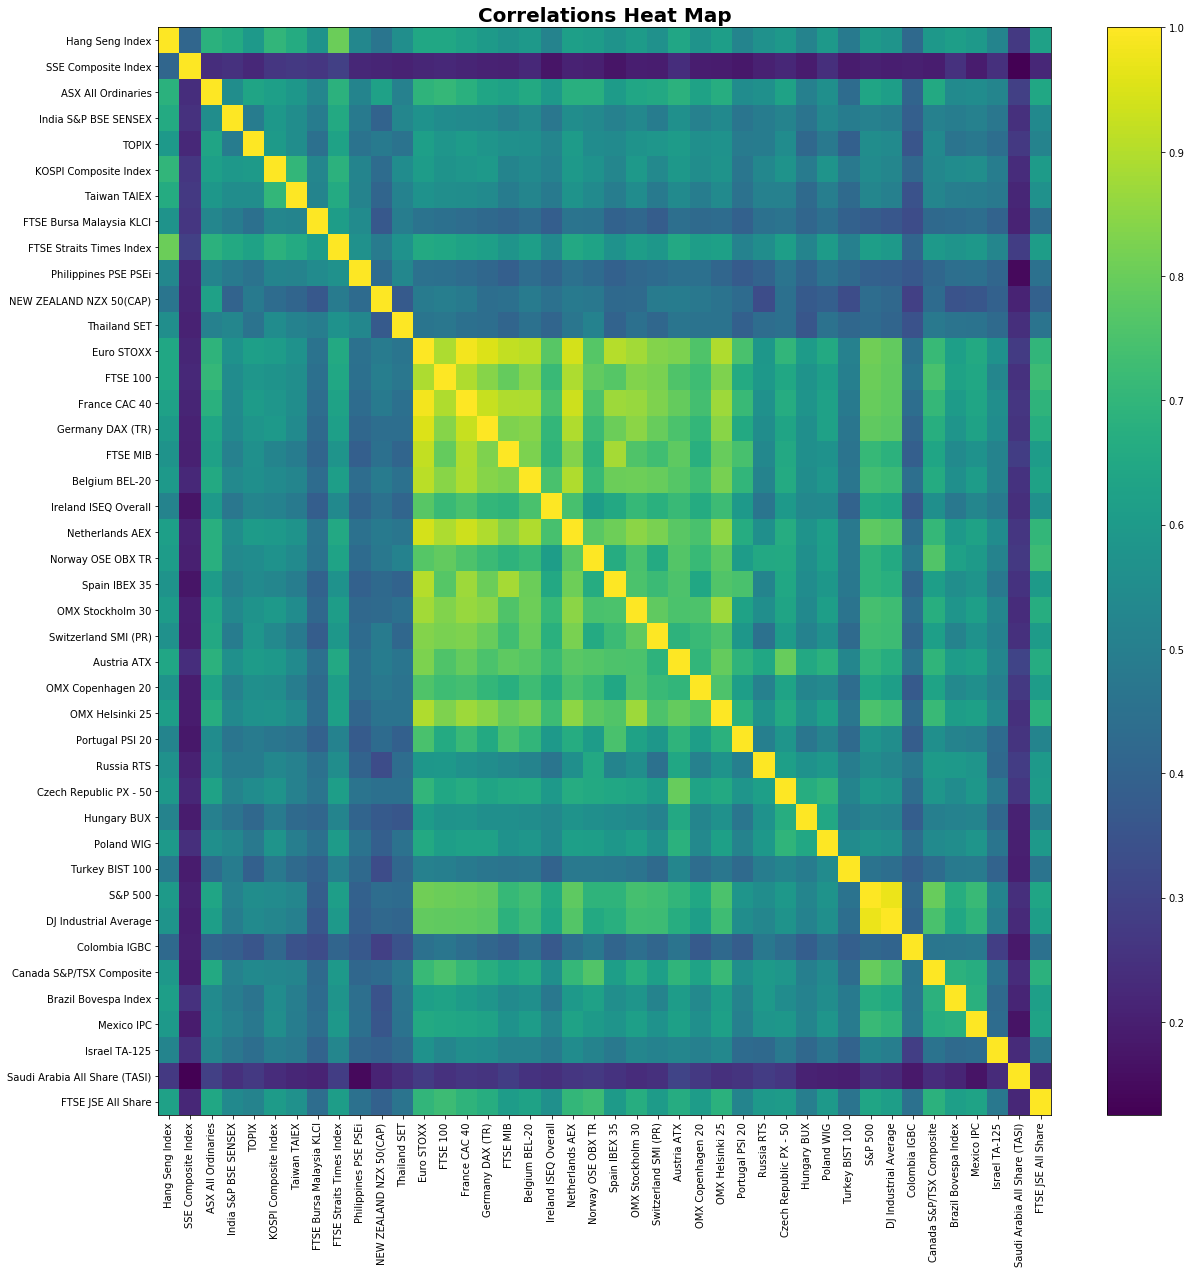

In [134]:
#Calculate correlation
corr = daily_ret.corr()

#Plot the correlation heatmap
plt.figure(figsize=(20,20))
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns)
plt.title('Correlations Heat Map', fontsize=20, fontweight='bold')
plt.show()

In [135]:
#Seperate the features and the labels
labels = lagged_data.iloc[:,0]
X = lagged_data.drop(daily_ret.columns[0], axis=1).reset_index(drop=True)

#Generate the labels from daily Hang Seng returns

#Set labels cutoff for defining Up/Down/Neutral states
labels_cutoff = 0.000627 #Try lower levels....0.05 seems a bit too high

y = np.empty(labels.shape)
y[labels < -labels_cutoff] = -1 #Label -1 for returns lower than -0.05%
y[labels > labels_cutoff] = 1 #Label 1 for returns greater than 0.05%
y[(labels <= labels_cutoff ) & (labels >= -labels_cutoff)] = 0 #Label 0 for the rest

In [136]:
#Import Keras module
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping

#Import sklearn module
from sklearn.metrics import confusion_matrix

In [150]:
#Split into training set and test set
train_size = 0.8 #Again parameter to tune
val_size = 0.1

train_cut_index = int(np.floor(train_size * X.shape[0]))
val_cut_index = int(np.floor((train_size + val_size) * X.shape[0]))

X_train = np.array(X.iloc[0:(train_cut_index-1),:])
X_val = np.array(X.iloc[train_cut_index:(val_cut_index - 1),:])
X_test = np.array(X.iloc[val_cut_index:X.shape[0],:])

y_train = y[0:(train_cut_index-1)]
y_val = y[train_cut_index:val_cut_index-1]
y_test = y[val_cut_index:len(y)]

#Preproc the y_train and y_test using to_categorical function
y_train = to_categorical(y_train, num_classes=3)
y_val = to_categorical(y_val, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

In [151]:
#Prediction Period
print("Training Period Start:", dates[0])
print("Training Period End:", dates[train_cut_index-1])
print("Validation Period Start:", dates[train_cut_index])
print("Validation Period End:", dates[val_cut_index-1])
print("Test Period Start:", dates[val_cut_index])
print("Test Period End:", dates[len(dates)-1])
print("Number of data points in training set:", X_train.shape[0])
print("Number of data points in validation set:", X_val.shape[0])
print("Number of data points in test set:", X_test.shape[0])

Training Period Start: 20030311
Training Period End: 20140930
Validation Period Start: 20141001
Validation Period End: 20160310
Test Period Start: 20160311
Test Period End: 20170821
Number of data points in training set: 3015
Number of data points in validation set: 376
Number of data points in test set: 377


In [152]:
#Reshape data for inputting into LSTM
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

y_train = np.reshape(y_train, (y_train.shape[0], 1, y_train.shape[1]))
y_val = np.reshape(y_val, (y_val.shape[0], 1, y_val.shape[1]))
y_test = np.reshape(y_test, (y_test.shape[0], 1, y_test.shape[1]))

In [153]:
#Evaluation metrics
from keras import backend as K

#Define f-beta score
def fbeta(y_true, y_pred, threshold_shift=0):
    beta = 0.6

    # just in case of hipster activation at the final layer
    y_pred = K.clip(y_pred, 0, 1)

    # shifting the prediction threshold from .5 if needed
    y_pred_bin = K.round(y_pred + threshold_shift)

    tp = K.sum(K.round(y_true * y_pred_bin), axis=1) + K.epsilon()
    fp = K.sum(K.round(K.clip(y_pred_bin - y_true, 0, 1)), axis=1)
    fn = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)), axis=1)

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    beta_squared = beta ** 2
    return K.mean((beta_squared + 1) * (precision * recall) / (beta_squared * precision + recall + K.epsilon()))

#Define precision score
def precision(y_true, y_pred, threshold_shift=0):

    # just in case of hipster activation at the final layer
    y_pred = K.clip(y_pred, 0, 1)

    # shifting the prediction threshold from .5 if needed
    y_pred_bin = K.round(y_pred + threshold_shift)

    tp = K.sum(K.round(y_true * y_pred_bin), axis=1) + K.epsilon()
    fp = K.sum(K.round(K.clip(y_pred_bin - y_true, 0, 1)), axis=1)

    precision = tp / (tp + fp)

    return precision

def hit_rate(y_true, y_pred):
    
    #Calculate Hit Rate of the prediction
    true_class = K.argmax(y_true, axis = -1)
    pred_class = K.argmax(y_pred, axis = -1)
    

In [154]:
#Print model evaluation metrics, takes in model scores from training and test set
def print_metrics(model_score):
    print("Test Loss:", model_score[0])
    print("Test F-beta:", model_score[1])
    print("Test Precision:", model_score[2])
    print("Test Accuracy:", model_score[3])

In [155]:
#Define plot metrics - can add more metrics towards it

def plot_metrics(model):
       
    #Plotting Loss over Epoch
    plt.figure(1)
    plt.plot(model.history['loss'])
    plt.plot(model.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training','Test'], loc='upper left')
    
    #Plotting F-beta over Epoch
    plt.figure(2)
    plt.plot(model.history['fbeta'])
    plt.plot(model.history['val_fbeta'])
    plt.title('F-Beta Score, beta=0.6')
    plt.ylabel('F-Beta Score')
    plt.xlabel('Epoch')
    plt.legend(['Training','Test'], loc='upper left')
    
    #Plotting Precision over Epoch
    plt.figure(3)
    plt.plot(model.history['precision'])
    plt.plot(model.history['val_precision'])
    plt.title('Model Precision')
    plt.ylabel('Precision')
    plt.xlabel('Epoch')
    plt.legend(['Training','Test'], loc='upper left')
    
    #Plotting Hit Rate over Epoch
    plt.figure(4)
    plt.plot(model.history['acc'])
    plt.plot(model.history['val_acc'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training','Test'], loc='upper left')
    
    plt.show()

In [156]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = "Normalized confusion matrix"
    else:
        title = 'Confusion matrix, without normalization'

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [157]:
#Utility function to return class numbers from probabilities
def prob_to_class(pred):
    return(np.argmax(pred, axis=-1))

In [158]:
#Setting base LSTM Network Parameters
drop_out = 0.65
input_shape = X_train.shape
num_epoch = 100
loss_fcn = 'categorical_crossentropy'
learning_rate = 0.0003
opt = optimizers.Nadam(lr=learning_rate)
num_of_perceptron = np.int(0.5 * (X_train.shape[2] + 3))

In [159]:
#Callbacks
saveModel = ModelCheckpoint(filepath='weights.hdf5', verbose=1, save_best_only=True, mode='auto')
earlyStop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto', min_delta=0.0001)
callbacks = [saveModel, earlyStop]

In [160]:
%%time
#Fit LSTM
from keras.layers import LSTM

#Setting up the instance
lstm_model = Sequential()

#Adding 1st LSTM layer
lstm_model.add(LSTM(num_of_perceptron, input_shape=input_shape[1:], return_sequences=True))
lstm_model.add(Dropout(drop_out))

#Adding Output Layer
lstm_model.add(Dense(3, activation='softmax'))
lstm_model.summary()

#Optimization
#Define Optimizer, using Stochastic Gradient Decent
lstm_model.compile(loss=loss_fcn, optimizer=opt, metrics=[fbeta, precision, 'accuracy'])

#Fitting the model
lstm = lstm_model.fit(X_train, y_train, epochs = num_epoch, verbose=1, validation_data=(X_val, y_val), shuffle=False, batch_size=1, callbacks=callbacks)

#Evaluation
lstm_score = lstm_model.evaluate(X_test, y_test)

#Predict
lstm_pred = lstm_model.predict(X_test, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 1, 22)             5632      
_________________________________________________________________
dropout_4 (Dropout)          (None, 1, 22)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 1, 3)              69        
Total params: 5,701
Trainable params: 5,701
Non-trainable params: 0
_________________________________________________________________
Train on 3015 samples, validate on 376 samples
Epoch 1/100
3015/3015 [==============================] - 8s - loss: 0.8355 - fbeta: 0.7319 - precision: 0.9705 - acc: 0.6375 - val_loss: 0.6836 - val_fbeta: 0.7943 - val_precision: 0.9255 - val_acc: 0.6995
Epoch 2/100
3015/3015 [==============================] - 7s - loss: 0.6247 - fbeta: 0.8197 - precision: 0.9290 - acc: 0.7347 - val_loss: 0.5936 - val_f

3015/3015 [==============================] - 7s - loss: 0.4909 - fbeta: 0.8705 - precision: 0.9385 - acc: 0.8066 - val_loss: 0.4862 - val_fbeta: 0.8697 - val_precision: 0.9362 - val_acc: 0.8059
Epoch 20/100
3015/3015 [==============================] - 7s - loss: 0.4988 - fbeta: 0.8706 - precision: 0.9384 - acc: 0.8060 - val_loss: 0.4858 - val_fbeta: 0.8706 - val_precision: 0.9371 - val_acc: 0.8032
Epoch 21/100
3015/3015 [==============================] - 7s - loss: 0.4906 - fbeta: 0.8723 - precision: 0.9395 - acc: 0.8090 - val_loss: 0.4856 - val_fbeta: 0.8697 - val_precision: 0.9362 - val_acc: 0.8059
Epoch 22/100
3015/3015 [==============================] - 7s - loss: 0.4873 - fbeta: 0.8708 - precision: 0.9391 - acc: 0.8050 - val_loss: 0.4843 - val_fbeta: 0.8723 - val_precision: 0.9379 - val_acc: 0.8059
Epoch 23/100
3015/3015 [==============================] - 7s - loss: 0.4892 - fbeta: 0.8713 - precision: 0.9390 - acc: 0.8060 - val_loss: 0.4837 - val_fbeta: 0.8723 - val_precision: 0.9

3015/3015 [==============================] - 7s - loss: 0.4823 - fbeta: 0.8743 - precision: 0.9395 - acc: 0.8096 - val_loss: 0.4813 - val_fbeta: 0.8750 - val_precision: 0.9397 - val_acc: 0.8112
Epoch 40/100
3015/3015 [==============================] - 7s - loss: 0.4848 - fbeta: 0.8756 - precision: 0.9402 - acc: 0.8136 - val_loss: 0.4809 - val_fbeta: 0.8732 - val_precision: 0.9388 - val_acc: 0.8112
Epoch 41/100
3015/3015 [==============================] - 7s - loss: 0.4805 - fbeta: 0.8746 - precision: 0.9404 - acc: 0.8123 - val_loss: 0.4810 - val_fbeta: 0.8732 - val_precision: 0.9388 - val_acc: 0.8138
Epoch 42/100
3015/3015 [==============================] - 7s - loss: 0.4807 - fbeta: 0.8723 - precision: 0.9382 - acc: 0.8086 - val_loss: 0.4814 - val_fbeta: 0.8768 - val_precision: 0.9388 - val_acc: 0.8165
Epoch 43/100
3015/3015 [==============================] - 6s - loss: 0.4776 - fbeta: 0.8745 - precision: 0.9395 - acc: 0.8123 - val_loss: 0.4814 - val_fbeta: 0.8759 - val_precision: 0.9

3015/3015 [==============================] - 6s - loss: 0.4771 - fbeta: 0.8741 - precision: 0.9396 - acc: 0.8123 - val_loss: 0.4795 - val_fbeta: 0.8785 - val_precision: 0.9415 - val_acc: 0.8165
Epoch 00060: early stopping
 32/377 [=>............................] - ETA: 2sWall time: 7min 49s


Test Loss: 0.629834286335
Test F-beta: 0.831122894976
Test Precision: 0.917771874277
Test Accuracy: 0.742705568553


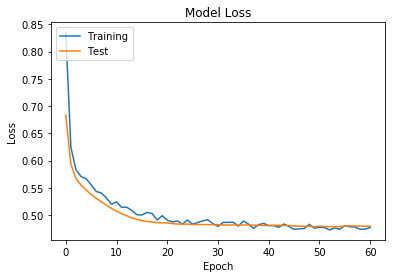

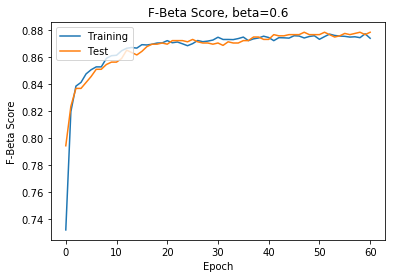

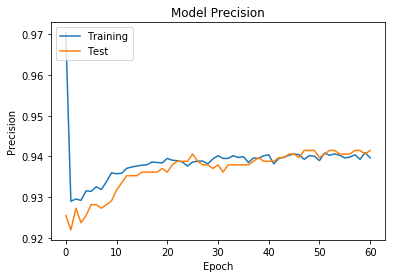

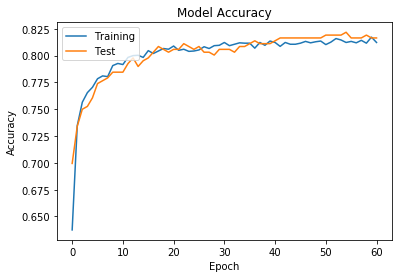

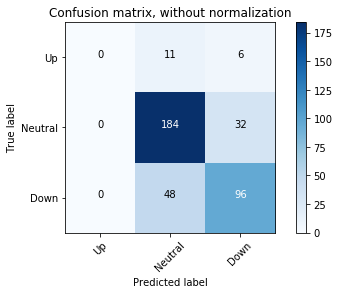

In [161]:
    print_metrics(lstm_score)
    
    plot_metrics(lstm)
    
    cfm = confusion_matrix(prob_to_class(y_test), prob_to_class(lstm_pred)) 
    plot_confusion_matrix(cfm, classes=['Up', 'Neutral', 'Down'], normalize=False)

In [166]:
X_test

array([[[-0.02246196,  0.01420624, -0.01172367, ...,  0.01698039,
          0.02198359, -0.00490183]],

       [[-0.0131465 ,  0.00721735,  0.01316648, ...,  0.01698039,
          0.02198359, -0.00886821]],

       [[-0.01284103, -0.00017411,  0.01791356, ...,  0.01866556,
         -0.0156428 , -0.00384363]],

       ..., 
       [[ 0.00204595,  0.00285277, -0.00150368, ...,  0.0134572 ,
         -0.00347582, -0.00798913]],

       [[ 0.01858341,  0.00953048, -0.01237491, ...,  0.02044389,
          0.00204964, -0.00513645]],

       [[ 0.01518836,  0.00024224, -0.00242311, ...,  0.02044389,
          0.00204964,  0.00269964]]])